# 04-1 데이터 시각화가 필요한 이유

In [1]:
import seaborn as sns

anscombe = sns.load_dataset("anscombe")
print(anscombe)

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

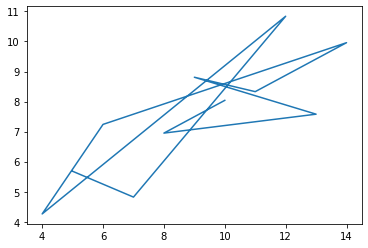

In [8]:
#matplotlib 라이브러리로 그래프 그리기
import matplotlib.pyplot as plt
dataset_1 = anscombe[anscombe['dataset'] == 'I']
plt.plot(dataset_1['x'], dataset_1['y'])   #plot 메서드는 기본적으로 선으로 그래프 생성

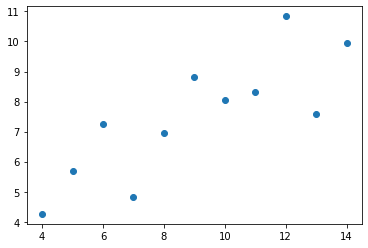

In [9]:
plt.plot(dataset_1['x'], dataset_1['y'], 'o')   #세 번째 인자에 'o'를 입력하면 점으로 그래프 생성

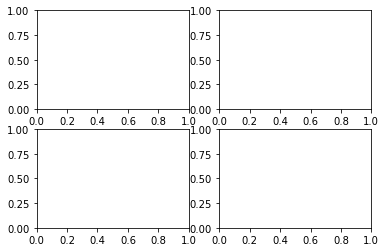

In [22]:
#한 번에 4개의 그래프 그리기1
dataset_1 = anscombe[anscombe['dataset'] == 'I']
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4= anscombe[anscombe['dataset'] == 'IV']

fig = plt.figure()                  #그래프 격자가 위치할 기본 틀 만들기
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)    #기본 틀에 그래프 격자 그리기

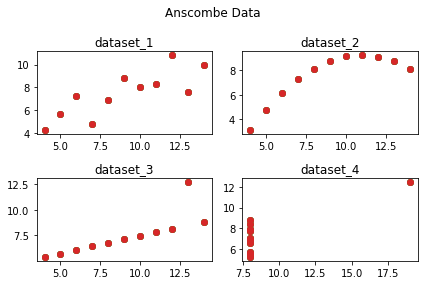

In [26]:
#한 번에 4개의 그래프 그리기2
axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')    #각각의 격자에 그래프 생성

axes1.set_title("dataset_1")
axes2.set_title("dataset_2")
axes3.set_title("dataset_3")
axes4.set_title("dataset_4")    #격자에 제목 추가

fig.suptitle("Anscombe Data")   #기본 틀에 제목 추가

fig.tight_layout()    #각 격자가 겹치지 않도록 자동 간격 조절

fig

# 04-2 matplotlib 라이브러리 자유자재로 사용하기

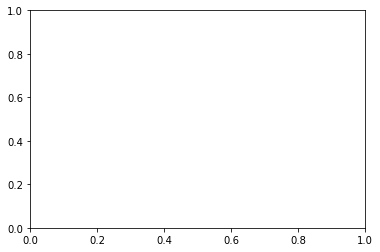

In [40]:
tips = sns.load_dataset("tips")
fig = plt.figure()
axes1 = fig.add_subplot(1, 1, 1)

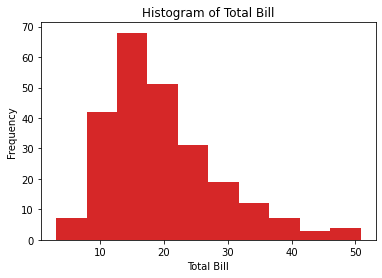

In [55]:
#히스토그램 그리기
axes1.hist(tips['total_bill'], bins = 10)    #10개의 막대로 히스토그램 구성
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Frequency')

fig

Text(0, 0.5, 'Tip')

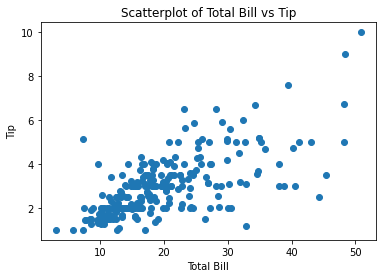

In [57]:
#산점도 그리기
scatter_plot = plt.figure()                     #그래프 격자가 위치할 기본 틀 만들기
axes1 = scatter_plot.add_subplot(1, 1, 1)       #기본 틀에 그래프 격자 그리기
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

Text(0.5, 1.0, 'Boxplot of Tips by Sex')

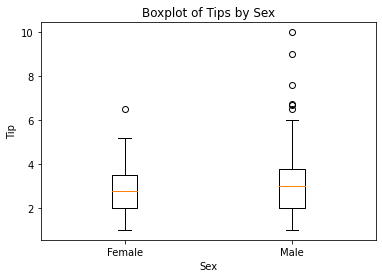

In [60]:
#상자그림 그리기
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1, 1, 1)
axes1.boxplot([tips[tips['sex'] == 'Female']['tip'],
               tips[tips['sex'] == 'Male']['tip']],
               labels = ['Female', 'Male'])
axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')

     total_bill   tip     sex smoker   day    time  size sex_color
0         16.99  1.01  Female     No   Sun  Dinner     2         0
1         10.34  1.66    Male     No   Sun  Dinner     3         1
2         21.01  3.50    Male     No   Sun  Dinner     3         1
3         23.68  3.31    Male     No   Sun  Dinner     2         1
4         24.59  3.61  Female     No   Sun  Dinner     4         0
..          ...   ...     ...    ...   ...     ...   ...       ...
239       29.03  5.92    Male     No   Sat  Dinner     3         1
240       27.18  2.00  Female    Yes   Sat  Dinner     2         0
241       22.67  2.00    Male    Yes   Sat  Dinner     2         1
242       17.82  1.75    Male     No   Sat  Dinner     2         1
243       18.78  3.00  Female     No  Thur  Dinner     2         0

[244 rows x 8 columns]


Text(0, 0.5, 'Tip')

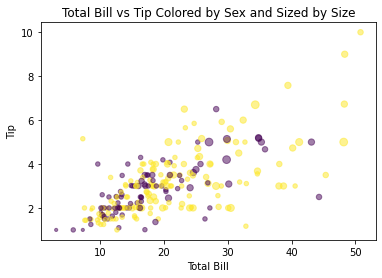

In [69]:
#다변량 데이터로 산점도 그리기
def recode_sex(sex):
    if sex == 'Female':
        return 0
    else:
        return 1
    
tips['sex_color'] = tips['sex'].apply(recode_sex)
print(tips)

scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(
    x = tips['total_bill'],
    y = tips['tip'],
    s = tips['size'] * 10,    #점의 크기 설정
    c = tips['sex_color'],    #점의 색상
    alpha = 0.5)              #점의 투명도
axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

# 04-3 seaborn 라이브러리 자유자재로 사용하기

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

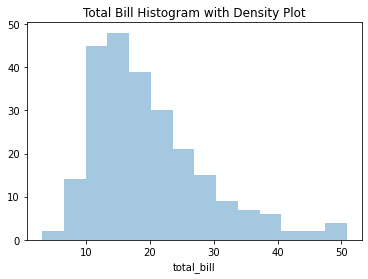

In [72]:
#히스토그램 그리기
import seaborn as sns
tips = sns.load_dataset("tips")
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], kde = False)   #kde = False 옵션을 지우면 밀집도 그래프 생성, hist = False는 밀집도 그래프만 생성
ax.set_title('Total Bill Histogram with Density Plot')

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency')

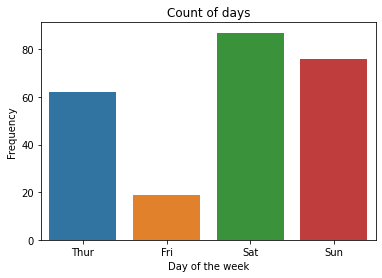

In [75]:
#막대그래프 그리기
ax = plt.subplots()
ax = sns.countplot(tips['day'])
ax.set_title('Count of days')
ax.set_xlabel('Day of the week')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Tip')

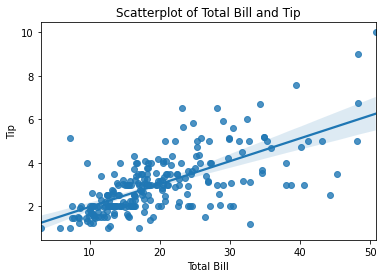

In [77]:
#seaborn 라이브러리로 산점도 그래프 그리기
ax = plt.subplots()
ax = sns.regplot(x = 'total_bill', y = 'tip', data = tips)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

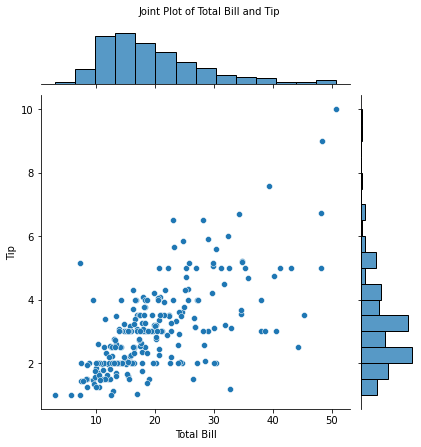

In [79]:
#산점도와 히스토그램 한 번에 그리기
joint = sns.jointplot(x = 'total_bill', y = 'tip', data = tips)
joint.set_axis_labels(xlabel = 'Total Bill', ylabel = 'Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize = 10, y = 1.03)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:1641: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Tip')

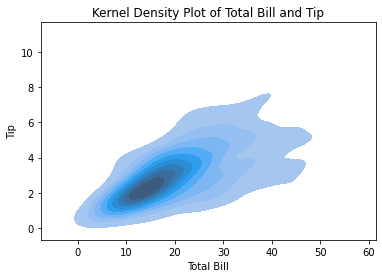

In [84]:
#이차원 밀집도 그리기
ax = plt.subplots()
ax = sns.kdeplot(data = tips['total_bill'],
                 data2 = tips['tip'],
                 shade = True)                              #밀도가 많은 지역에 음영을 주는 옵션
ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Total bill')

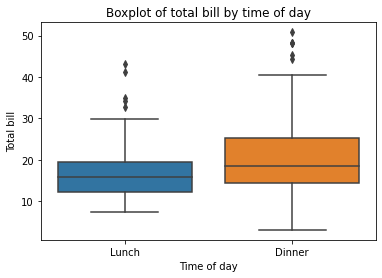

In [93]:
#상자그림 그리기
ax = plt.subplots()
ax = sns.boxplot(x = 'time', y = 'total_bill', data = tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total bill')

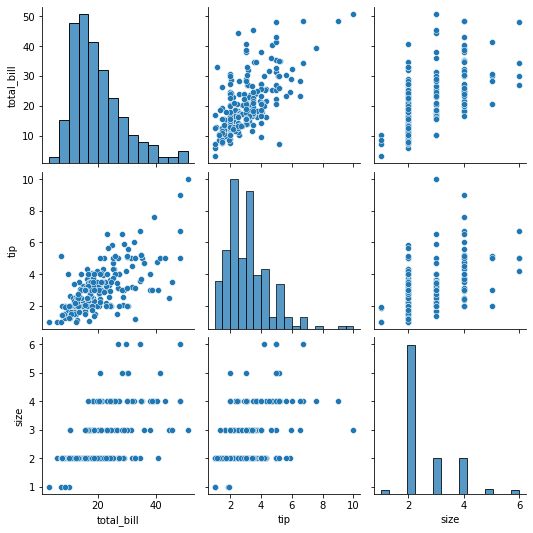

In [102]:
#관계그래프 그리기
fig = sns.pairplot(tips)

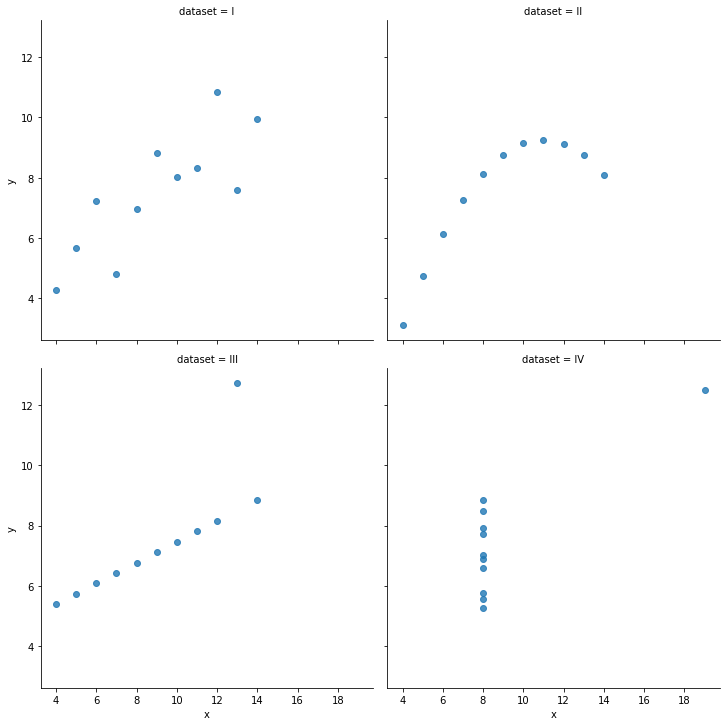

In [108]:
#Implot 메서드로 4개의 데이터 그룹에 대한 그래프 한 번에 그리기
anscombe_plot = sns.lmplot(x = 'x', y = 'y', data = anscombe, fit_reg = False,
                           col = 'dataset', col_wrap = 2)

# 04-4 데이터프레임과 시리즈로 그래프 그리기

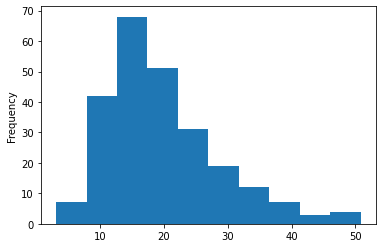

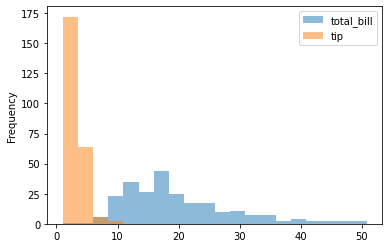

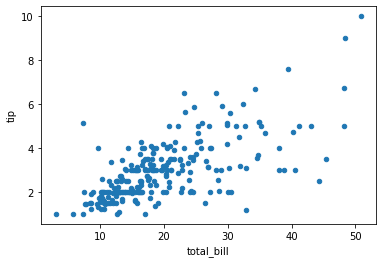

In [127]:
ax = plt.subplots()
ax = tips['total_bill'].plot.hist()                                  #히스토그램 그리기
ax = tips[['total_bill', 'tip']].plot.hist(alpha = 0.5, bins = 20)   #두 개의 변수 동시에 그리기
ax = tips.plot.scatter(x = 'total_bill', y = 'tip')                  #산점도 그리기